그룹 연산
* 복잡한 데이터를 어떤 기준에 따라 여러 그룹으로 나누어서 관찰할 수 있으며 이런 방식으로 분할 처리하는 것을 그룹 연산이라 함
* 그룹 연산은 데이터를 집계, 변환, 필터링하는데 효율적이며 판다스 groupby() 메소드를 사용함
* 그룹 객체 만들기(분할)
* 그룹 연산 메소드(적용-결합)

In [ ]:
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

print('승객 수:', len(df))
print(df.head())

승객 수: 891
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0


In [ ]:
# class 열을 기준으로 분할(1개 열을 기준)
grouped = df.groupby(['class']) 
print(grouped)
# list(grouped)

In [ ]:
# 그룹 객체를 iteration으로 출력: head() 메소드로 첫 5행만을 출력
for key, group in grouped:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.head())

* key : First
* number : 216
     age     sex  class     fare  survived
1   38.0  female  First  71.2833         1
3   35.0  female  First  53.1000         1
6   54.0    male  First  51.8625         0
11  58.0  female  First  26.5500         1
23  28.0    male  First  35.5000         1
* key : Second
* number : 184
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1
* key : Third
* number : 491
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0


In [ ]:
# 연산 메소드 적용
average = grouped.mean()
print(average)

              age       fare  survived
class                                 
First   38.233441  84.154687  0.629630
Second  29.877630  20.662183  0.472826
Third   25.140620  13.675550  0.242363


In [ ]:
stat = grouped.max()
stat

,age,sex,fare,survived
class,,,,
First,80.0,male,512.3292,1
Second,70.0,male,73.5000,1
Third,74.0,male,69.5500,1


In [ ]:
# Q. 'Third'그룹만을 선택해서 group3 이름으로 저장하고 통계요약표를 출력하세요.

In [ ]:
# 개별 그룹 선택하기
group3 = grouped.get_group('Third')
print(group3.head())

    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0


In [ ]:
group3.describe()

,age,fare,survived
count,355.000000,491.000000,491.000000
mean,25.140620,13.675550,0.242363
std,12.495398,11.778142,0.428949
min,0.420000,0.000000,0.000000
25%,18.000000,7.750000,0.000000
50%,24.000000,8.050000,0.000000
75%,32.000000,15.500000,0.000000
max,74.000000,69.550000,1.000000


In [ ]:
group1 = grouped.get_group('First')
group1.describe()

,age,fare,survived
count,186.000000,216.000000,216.000000
mean,38.233441,84.154687,0.629630
std,14.802856,78.380373,0.484026
min,0.920000,0.000000,0.000000
25%,27.000000,30.923950,0.000000
50%,37.000000,60.287500,1.000000
75%,49.000000,93.500000,1.000000
max,80.000000,512.329200,1.000000


In [ ]:
# Q. class 열, sex 열을 기준으로 분할하여 grouped_two에 저장하세요.

In [ ]:
# class 열, sex 열을 기준으로 분할(여러 열을 기준으로 분할)
grouped_two = df.groupby(['class', 'sex']) 

In [ ]:
Q. grouped_two 그룹 객체를 for문을 사용, iteration으로 출력하세요.

In [ ]:
# grouped_two 그룹 객체를 iteration으로 출력
for key, group in grouped_two:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.head())

* key : ('First', 'female')
* number : 94
     age     sex  class      fare  survived
1   38.0  female  First   71.2833         1
3   35.0  female  First   53.1000         1
11  58.0  female  First   26.5500         1
31   NaN  female  First  146.5208         1
52  49.0  female  First   76.7292         1
* key : ('First', 'male')
* number : 122
     age   sex  class      fare  survived
6   54.0  male  First   51.8625         0
23  28.0  male  First   35.5000         1
27  19.0  male  First  263.0000         0
30  40.0  male  First   27.7208         0
34  28.0  male  First   82.1708         0
* key : ('Second', 'female')
* number : 76
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
41  27.0  female  Second  21.0000         0
43   3.0  female  Second  41.5792         1
53  29.0  female  Second  26.0000         1
* key : ('Second', 'male')
* number : 108
     age   sex   class  fare  survived
17   NaN  mal

In [ ]:
# Q. grouped_two 그룹 객체에 연산 메소드 적용, 각 그룹의 평균값을 구한 후 출력하세요.

In [ ]:
# grouped_two 그룹 객체에 연산 메소드 적용
average_two = grouped_two.mean()
print(average_two)

                     age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447


In [ ]:
# Q. grouped_two 그룹 객체에서 ('Third',female) 그룹을 선택해서 group3f에 저장하고 처음 5개행을 출력하세요.

In [ ]:
print(type(average_two))

# grouped_two 그룹 객체에서 개별 그룹 선택하기
group3f = grouped_two.get_group(('Third','female'))
print(group3f.head())

<class 'pandas.core.frame.DataFrame'>
     age     sex  class     fare  survived
2   26.0  female  Third   7.9250         1
8   27.0  female  Third  11.1333         1
10   4.0  female  Third  16.7000         1
14  14.0  female  Third   7.8542         0
18  31.0  female  Third  18.0000         0


적용-결합

데이터 집계(agg), 
- 집계 연산을 처리하는 사용자 정의 함수를 그룹 객체에 적용하려면 agg() 메서드 사용
- 모든열에 여러 함수를 매핑 : group객체.agg([함수1,함수2,함수3,…])
- 각 열마다 다른 함수를 매핑 : group객체.agg({‘열1’: 함수1, ‘열2’:함수2, …})

변환(transform)
- 원소의 본래 행 인덱스와 열 이름을 기준으로 연산 결과를 반환
- 데이터 변환 연산 : group객체.transform(매핑함수)

필터링(filter)
- 그룹 객체에 filter() 메서드를 적용할 때 조건식을 가진 함수를 전달하면 조건이 참인 그룹만을 남김
- 그룹 객체 필터링 : group 객체.filter(조건 함수식)

객체에 함수 매핑(apply)
 - 판다스 객체의 개별 원소를 특정 함수에 일대일로 매핑. 사용자가 원하는 대부분의 연산을 그룹 객체에 적용
 - group 객체.apply(매핑함수)
 
https://kongdols-room.tistory.com/166

In [ ]:
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

# class 열을 기준으로 분할
grouped = df.groupby(['class']) 

In [ ]:
list(grouped)

In [ ]:
mean_all = grouped.mean()  
print(mean_all)
print()
print(type(mean_all))

              age       fare  survived
class                                 
First   38.233441  84.154687  0.629630
Second  29.877630  20.662183  0.472826
Third   25.140620  13.675550  0.242363

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# 각 그룹에 대한 모든 열의 표준편차를 집계하여 데이터프레임으로 반환
std_all = grouped.std()  
print(std_all)
print()
print(type(std_all))

              age       fare  survived
class                                 
First   14.802856  78.380373  0.484026
Second  14.001077  13.417399  0.500623
Third   12.495398  11.778142  0.428949

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# 각 그룹에 대한 fare 열의 표준편차를 집계하여 시리즈로 반환 
std_fare = grouped.fare.std()  
print(std_fare)
print()
print(type(std_fare))

class
First     78.380373
Second    13.417399
Third     11.778142
Name: fare, dtype: float64

<class 'pandas.core.series.Series'>


In [ ]:
# Q. 최대값 - 최소값을 반환하는 사용자 함수를 정의하고 agg()함수에 인수로 전달하여 그룹별로 집계하여 
# agg_minmax 이름으로 저장 후 처음 5개행을 출력하세요.

In [ ]:
# 그룹 객체에 agg() 메소드 적용 - 사용자 정의 함수를 인수로 전달
def min_max(x):    # 최대값 - 최소값
    return x.max() - x.min()

# 각 그룹의 최대값과 최소값의 차이를 계산하여 그룹별로 집계
agg_minmax = grouped.agg(min_max)  
print(agg_minmax.head())

          age      fare  survived
class                            
First   79.08  512.3292         1
Second  69.33   73.5000         1
Third   73.58   69.5500         1


In [ ]:
# 모든열에 여러 함수를 매핑 : group객체.agg([함수1,함수2,함수3,…])
# 각 열마다 다른 함수를 매핑 : group객체.agg({‘열1’: 함수1, ‘열2’:함수2, …})

agg_all = grouped.agg(['min', 'max'])  
print(agg_all.head())

         age           sex       fare           survived    
         min   max     min   max  min       max      min max
class                                                       
First   0.92  80.0  female  male  0.0  512.3292        0   1
Second  0.67  70.0  female  male  0.0   73.5000        0   1
Third   0.42  74.0  female  male  0.0   69.5500        0   1


In [ ]:
# Q. grouped에 각 열마다 다른 함수를 적용하여 agg_sep 이름으로 저장하고 출력하세요.
# ('fare'는 'min', 'max', 'age'는 'mean')

In [ ]:
# 각 열마다 다른 함수를 적용하여 집계
agg_sep = grouped.agg({'fare':['min', 'max'], 'age':'mean'})  
print(agg_sep.head())

       fare                  age
        min       max       mean
class                           
First   0.0  512.3292  38.233441
Second  0.0   73.5000  29.877630
Third   0.0   69.5500  25.140620


In [ ]:
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

# class 열을 기준으로 분할
grouped = df.groupby(['class']) 

In [ ]:
# Q. 데이터 개수가 200개 이상인 그룹만을 필터링하여 데이터프레임으로 반환하여 
# grouped_filter 이름으로 저장 후 처음 5개행을 출력하세요.

In [ ]:
# 데이터 개수가 200개 이상인 그룹만을 필터링하여 데이터프레임으로 반환
grouped_filter = grouped.filter(lambda x: len(x) >= 200)  
print(grouped_filter.head())   
print()
print(type(grouped_filter))

    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0

<class 'pandas.core.frame.DataFrame'>


In [ ]:
grouped_filter.value_counts('class')

class
Third     491
First     216
Second      0
dtype: int64

In [ ]:
# Q. age 열의 평균이 30보다 작은 그룹만을 필터링하여 데이터프레임으로 반환하여 age_filter 이름으로 저장 후 
# 끝에서 5개행을 출력하세요.

In [ ]:
# age 열의 평균이 30보다 작은 그룹만을 필터링하여 데이터프레임으로 반환
age_filter = grouped.filter(lambda x: x.age.mean() < 30)  
print(age_filter.tail())   
print()
print(type(age_filter))

      age     sex   class    fare  survived
884  25.0    male   Third   7.050         0
885  39.0  female   Third  29.125         0
886  27.0    male  Second  13.000         0
888   NaN  female   Third  23.450         0
890  32.0    male   Third   7.750         0

<class 'pandas.core.frame.DataFrame'>


In [1]:
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

# class 열을 기준으로 분할
grouped = df.groupby(['class']) 

In [ ]:
list(grouped)

In [ ]:
# 집계 : 각 그룹별 요약 통계정보를 집계
agg_grouped = grouped.apply(lambda x: x.describe())   
print(agg_grouped)# 집계 : 각 그룹별 요약 통계정보를 집계
agg_grouped = grouped.apply(lambda x: x.describe())   
print(agg_grouped)

                     age        fare    survived
class                                           
First  count  186.000000  216.000000  216.000000
       mean    38.233441   84.154687    0.629630
       std     14.802856   78.380373    0.484026
       min      0.920000    0.000000    0.000000
       25%     27.000000   30.923950    0.000000
       50%     37.000000   60.287500    1.000000
       75%     49.000000   93.500000    1.000000
       max     80.000000  512.329200    1.000000
Second count  173.000000  184.000000  184.000000
       mean    29.877630   20.662183    0.472826
       std     14.001077   13.417399    0.500623
       min      0.670000    0.000000    0.000000
       25%     23.000000   13.000000    0.000000
       50%     29.000000   14.250000    0.000000
       75%     36.000000   26.000000    1.000000
       max     70.000000   73.500000    1.000000
Third  count  355.000000  491.000000  491.000000
       mean    25.140620   13.675550    0.242363
       std     12.49

In [2]:
# z-score를 계산하는 사용자 함수 정의
# z-score : 평균값에서 표준편차의 몇배 떨어져 있는지를 평가하는 수치
def z_score(x):                          
    return (x - x.mean()) / x.std()

age_zscore = grouped.age.apply(z_score)   #기본값 axis=0 
print(age_zscore.head())

0   -0.251342
1   -0.015770
2    0.068776
3   -0.218434
4    0.789041
Name: age, dtype: float64


In [3]:
age_zscore = grouped.age.transform(z_score)   #기본값 axis=0 
print(age_zscore.head())

0   -0.251342
1   -0.015770
2    0.068776
3   -0.218434
4    0.789041
Name: age, dtype: float64


In [4]:
age_zscore = grouped.age.apply(lambda x: z_score(x))   #기본값 axis=0 
print(age_zscore.head())

0   -0.251342
1   -0.015770
2    0.068776
3   -0.218434
4    0.789041
Name: age, dtype: float64


In [ ]:
def z_score(x):
    return (x-x.mean())/x.std()

In [5]:
age_filter = grouped.apply(lambda x : x.age.mean() < 30)

In [6]:
# 필터링 : age 열의 데이터 평균이 30보다 작은 그룹만을 필터링하여 출력
age_filter = grouped.apply(lambda x: x.age.mean() < 30)  
print(age_filter)   
print()
for x in age_filter.index:
    if age_filter[x]==True:
        age_filter_df = grouped.get_group(x)
        print(age_filter_df.head())
        print()

class
First     False
Second     True
Third      True
dtype: bool

     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1

    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4  35.0    male  Third   8.0500         0
5   NaN    male  Third   8.4583         0
7   2.0    male  Third  21.0750         0



In [ ]:
data = np.random.randint(1,100,size=(5,5))
df = pd.DataFrame(data, columns=list('abcde'))
df

,a,b,c,d,e
0,37,39,5,90,57
1,36,47,83,40,12
2,95,22,17,59,31
3,87,98,31,11,53
4,23,2,99,33,69


In [ ]:
df['f'] = df.apply(lambda x:x.a+x.b+x.c+x.d+x.e,axis=1)
df

,a,b,c,d,e,f
0,37,39,5,90,57,228
1,36,47,83,40,12,218
2,95,22,17,59,31,224
3,87,98,31,11,53,280
4,23,2,99,33,69,226


In [ ]:
def z_score(x):                          
    return (x - x.mean()) / x.std()

In [ ]:
df_zscore = df.a.transform(z_score)
df_zscore

0   -0.565248
1   -0.595637
2    1.197353
3    0.954235
4   -0.990703
Name: a, dtype: float64

In [ ]:
df_zscore = df.apply(lambda x:z_score(x))
df_zscore

,a,b,c,d,e,f
0,-0.565248,-0.072326,-1.009779,1.460278,0.554255,-0.284339
1,-0.595637,0.150215,0.865525,-0.222070,-1.425226,-0.679253
2,1.197353,-0.545223,-0.721271,0.417222,-0.589445,-0.442304
3,0.954235,1.568908,-0.384678,-1.197832,0.378301,1.769218
4,-0.990703,-1.101574,1.250202,-0.457599,1.082116,-0.363321


In [ ]:
# 멀티 인덱스 : 행 인덱스를 여러 레벨로 구현
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

# class 열, sex 열을 기준으로 분할
grouped = df.groupby(['class', 'sex']) 

In [ ]:
type(grouped.mean())

pandas.core.frame.DataFrame

In [ ]:
# 그룹 객체에 연산 메서드 적용
gdf = grouped.mean()
print(gdf)
print()
print(type(gdf))

                     age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

<class 'pandas.core.frame.DataFrame'>


In [ ]:
gdf = grouped.std()
print(gdf)
print()
print(type(gdf))

                     age       fare  survived
class  sex                                   
First  female  13.612052  74.259988  0.176716
       male    15.139570  77.548021  0.484484
Second female  12.872702  10.891796  0.271448
       male    14.793894  14.922235  0.365882
Third  female  12.729964  11.690314  0.501745
       male    12.159514  11.681696  0.342694

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Q. class 값이 First인 행을 선택하여 출력하세요.

In [ ]:
# class 값이 First인 행을 선택하여 출력
print(gdf.loc['First'])

              age       fare  survived
sex                                   
female  13.612052  74.259988  0.176716
male    15.139570  77.548021  0.484484


In [ ]:
# Q. class 값이 First이고, sex 값이 female인 행을 선택하여 출력하세요.

In [ ]:
# class 값이 First이고, sex 값이 female인 행을 선택하여 출력
print(gdf.loc[('First', 'female')])

age         13.612052
fare        74.259988
survived     0.176716
Name: (First, female), dtype: float64


In [ ]:
# Q. sex 값이 male인 행을 선택하여 출력하세요.

In [ ]:
# sex 값이 male인 행을 선택하여 출력
print(gdf.xs('male', level='sex'))

              age       fare  survived
class                                 
First   15.139570  77.548021  0.484484
Second  14.793894  14.922235  0.365882
Third   12.159514  11.681696  0.342694


피벗
* 피벗 테이블을 구성하는 4가지 요소(행 인덱스, 열 인덱스, 데이터 값, 데이터 집계함수)에 적용할 데이터프레임의 열을 각각 지정하여 함수의 인자로 전달

In [ ]:
# Q. data_pv.pkl을 불러와서 pivot 함수를 이용, 아래 옵션을 설정하여 피봇 작업을 수행하고 이름을 data_pv1로 저장한 후 
# 처음 5개행을 출력하세요.¶
# index="Country", columns="Indicator", values="Value"

In [ ]:
data_pv = pd.read_pickle('./dataset/data_pv.pkl')
print(data_pv.head())
data_pv1 = data_pv.pivot(index="Country", columns="Indicator", values="Value")
data_pv1.head()

In [ ]:
import pandas as pd
import seaborn as sns

# IPyhton 디스플레이 설정 변경 
pd.set_option('display.max_columns', 10)    # 출력할 최대 열의 개수
pd.set_option('display.max_colwidth', 20)    # 출력할 열의 너비
# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]
print(df.head())

In [ ]:
# 행, 열, 값, 집계에 사용할 열을 1개씩 지정 - 평균 집계
pdf1 = pd.pivot_table(df,              # 피벗할 데이터프레임
                     index='class',    # 행 위치에 들어갈 열
                     columns='sex',    # 열 위치에 들어갈 열
                     values='age',     # 데이터로 사용할 열
                     aggfunc='mean')   # 데이터 집계 함수

print(pdf1.head())

In [ ]:
# Q. 값에 적용하는 집계 함수를 2개 이상 지정 할 수 있다. 'mean', 'sum'을 지정하여 출력하세요.

In [ ]:
# 값에 적용하는 집계 함수를 2개 이상 지정 가능 - 생존율, 생존자 수 집계
pdf2 = pd.pivot_table(df,                       # 피벗할 데이터프레임
                     index='class',             # 행 위치에 들어갈 열
                     columns='sex',             # 열 위치에 들어갈 열
                     values='survived',         # 데이터로 사용할 열
                     aggfunc=['mean', 'sum'])   # 데이터 집계 함수

print(pdf2.head())

In [ ]:
# Q. 행, 열, 값에 사용할 열을 2개 이상 지정 할 수 있다. index, values, aggfunc에 각각 2개를 지정하여 출력하세요.

In [ ]:
# 행, 열, 값에 사용할 열을 2개 이상 지정 가능 - 평균 나이, 최대 요금 집계
pdf3 = pd.pivot_table(df,                       # 피벗할 데이터프레임
                     index=['class', 'sex'],    # 행 위치에 들어갈 열
                     columns='survived',        # 열 위치에 들어갈 열
                     values=['age', 'fare'],    # 데이터로 사용할 열
                     aggfunc=['mean', 'max'])   # 데이터 집계 함수

# IPython Console 디스플레이 옵션 설정
pd.set_option('display.max_columns', 10)        # 출력할 열의 개수 한도
print(pdf3.head())
print()

# 행, 열 구조 살펴보기
# print(pdf3.index)
# print(pdf3.columns)
# print()

### 시계열 데이터
- df의 행인덱스로 사용하면 시간으로 기록된 데이터를 분석하는 것이 매우 유용.
- 특정 시점을 기록하는 Timesstamp와 두 시점 사이의 일정한 기간을 나타내는 Period가 있음.
- 문자열 또는 숫자로 저장되어 있는 시간 데이터를 시계열 객체인 Timestamp로 변환하는 함수를 제공
- 판다스 to_datetime() 함수를 사용하면 문자열 등 다른 자료형을 판다스 Timestamp를 나타내는 datetime64 자료형으로 변환 가능.

In [ ]:
# 시계열 데이터
import pandas as pd
df = pd.read_csv('./dataset/stock-data.csv')
df.head()

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [ ]:
# 판다스는 다른 자료형으로 저장된 시간 데이터를 판다스 시계열 객체인 Timestamp로 변환하는 함수 제공
df['new_Date'] = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20 non-null     object        
 1   Close     20 non-null     int64         
 2   Start     20 non-null     int64         
 3   High      20 non-null     int64         
 4   Low       20 non-null     int64         
 5   Volume    20 non-null     int64         
 6   new_Date  20 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.2+ KB


In [ ]:
# 날짜 인덱스
df1 = df.copy()
df1.set_index('new_Date',inplace=True)
df1.drop('Date', axis=1, inplace=True)

In [ ]:
df1 = df.reset_index()
df1.head()

,index,Date,Close,Start,High,Low,Volume,new_Date
0,0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28
3,3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26


In [ ]:
df1 = df.copy()
df1['Year'] = df1.new_Date.dt.year
df1.head()

,Date,Close,Start,High,Low,Volume,new_Date,Year
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018


In [ ]:
df1['Month'] = df1.new_Date.dt.month
df1.head()

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6


In [ ]:
# 일정한 기간을 나타내는 Period 객체로 변환
df1['Date_m'] = df1.new_Date.dt.to_period(freq='M')
df1.head()

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Date_m
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2018-07
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,2018-06
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,2018-06
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,2018-06
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,2018-06


In [ ]:
# 날짜 인덱스
df1.set_index('new_Date',inplace=True)
df1.drop('Date', axis=1, inplace=True)

In [ ]:
df1.head()

,Close,Start,High,Low,Volume,Year,Month,Date_m
new_Date,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,7,2018-07
2018-06-29,10700,10550,10900,9990,170253,2018,6,2018-06
2018-06-28,10400,10900,10950,10150,155769,2018,6,2018-06
2018-06-27,10900,10800,11050,10500,133548,2018,6,2018-06
2018-06-26,10800,10900,11000,10700,63039,2018,6,2018-06


In [ ]:
# 날짜 인덱스를 이용하여 데이터 선택
df_y = df1.loc['2018-07']
df_y

,Close,Start,High,Low,Volume,Year,Month,Date_m
new_Date,,,,,,,,
2018-07-02,10100,10850,10900,10000,137977,2018,7,2018-07


In [ ]:
df_d = df1.loc['2018-06-27','Start':'High']
df_d

,Start,High
new_Date,,
2018-06-27,10800,11050


In [ ]:
# 시간 간격
today = pd.to_datetime('2018-12-25')
df1['time_delta'] = today - df1.index
df1.set_index('time_delta',inplace=True)
df1.head()

,Close,Start,High,Low,Volume,Year,Month,Date_m
time_delta,,,,,,,,
176 days,10100,10850,10900,10000,137977,2018,7,2018-07
179 days,10700,10550,10900,9990,170253,2018,6,2018-06
180 days,10400,10900,10950,10150,155769,2018,6,2018-06
181 days,10900,10800,11050,10500,133548,2018,6,2018-06
182 days,10800,10900,11000,10700,63039,2018,6,2018-06


In [ ]:
# 시계열 데이터 만들기
import pandas as pd

# Timestamp의 배열 만들기 - 월 간격, 월의 시작일 기준
ts_ms = pd.date_range(start='2019-01-01',    # 날짜 범위의 시작
                   end=None,                 # 날짜 범위의 끝
                   periods=12,                # 생성할 Timestamp의 개수
                   freq='MS',                # 시간 간격 (MS: 월의 시작일)
                   tz='Asia/Seoul')          # 시간대(timezone)
print(ts_ms)

DatetimeIndex(['2019-01-01 00:00:00+09:00', '2019-02-01 00:00:00+09:00',
               '2019-03-01 00:00:00+09:00', '2019-04-01 00:00:00+09:00',
               '2019-05-01 00:00:00+09:00', '2019-06-01 00:00:00+09:00',
               '2019-07-01 00:00:00+09:00', '2019-08-01 00:00:00+09:00',
               '2019-09-01 00:00:00+09:00', '2019-10-01 00:00:00+09:00',
               '2019-11-01 00:00:00+09:00', '2019-12-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')


pandas.core.indexes.datetimes.DatetimeIndex

In [ ]:
import warnings
warnings.filterwarnings('ignore')
df_a = df1.iloc[:12,:]
df_a['index'] = ts_ms
df_a.head()

,Close,Start,High,Low,Volume,Year,Month,Date_m,index
time_delta,,,,,,,,,
176 days,10100,10850,10900,10000,137977,2018,7,2018-07,2019-01-01 00:00:00+09:00
179 days,10700,10550,10900,9990,170253,2018,6,2018-06,2019-02-01 00:00:00+09:00
180 days,10400,10900,10950,10150,155769,2018,6,2018-06,2019-03-01 00:00:00+09:00
181 days,10900,10800,11050,10500,133548,2018,6,2018-06,2019-04-01 00:00:00+09:00
182 days,10800,10900,11000,10700,63039,2018,6,2018-06,2019-05-01 00:00:00+09:00


In [ ]:
df_a['Month'] = df_a['index'].dt.month
df_a.head()

,Close,Start,High,Low,Volume,Year,Month,Date_m,index
time_delta,,,,,,,,,
176 days,10100,10850,10900,10000,137977,2018,1,2018-07,2019-01-01 00:00:00+09:00
179 days,10700,10550,10900,9990,170253,2018,2,2018-06,2019-02-01 00:00:00+09:00
180 days,10400,10900,10950,10150,155769,2018,3,2018-06,2019-03-01 00:00:00+09:00
181 days,10900,10800,11050,10500,133548,2018,4,2018-06,2019-04-01 00:00:00+09:00
182 days,10800,10900,11000,10700,63039,2018,5,2018-06,2019-05-01 00:00:00+09:00


In [ ]:
df_a.set_index('Month',inplace=True)
df_a.head()

,Close,Start,High,Low,Volume,Year,Date_m,index
Month,,,,,,,,
1,10100,10850,10900,10000,137977,2018,2018-07,2019-01-01 00:00:00+09:00
2,10700,10550,10900,9990,170253,2018,2018-06,2019-02-01 00:00:00+09:00
3,10400,10900,10950,10150,155769,2018,2018-06,2019-03-01 00:00:00+09:00
4,10900,10800,11050,10500,133548,2018,2018-06,2019-04-01 00:00:00+09:00
5,10800,10900,11000,10700,63039,2018,2018-06,2019-05-01 00:00:00+09:00


<AxesSubplot:xlabel='Month'>

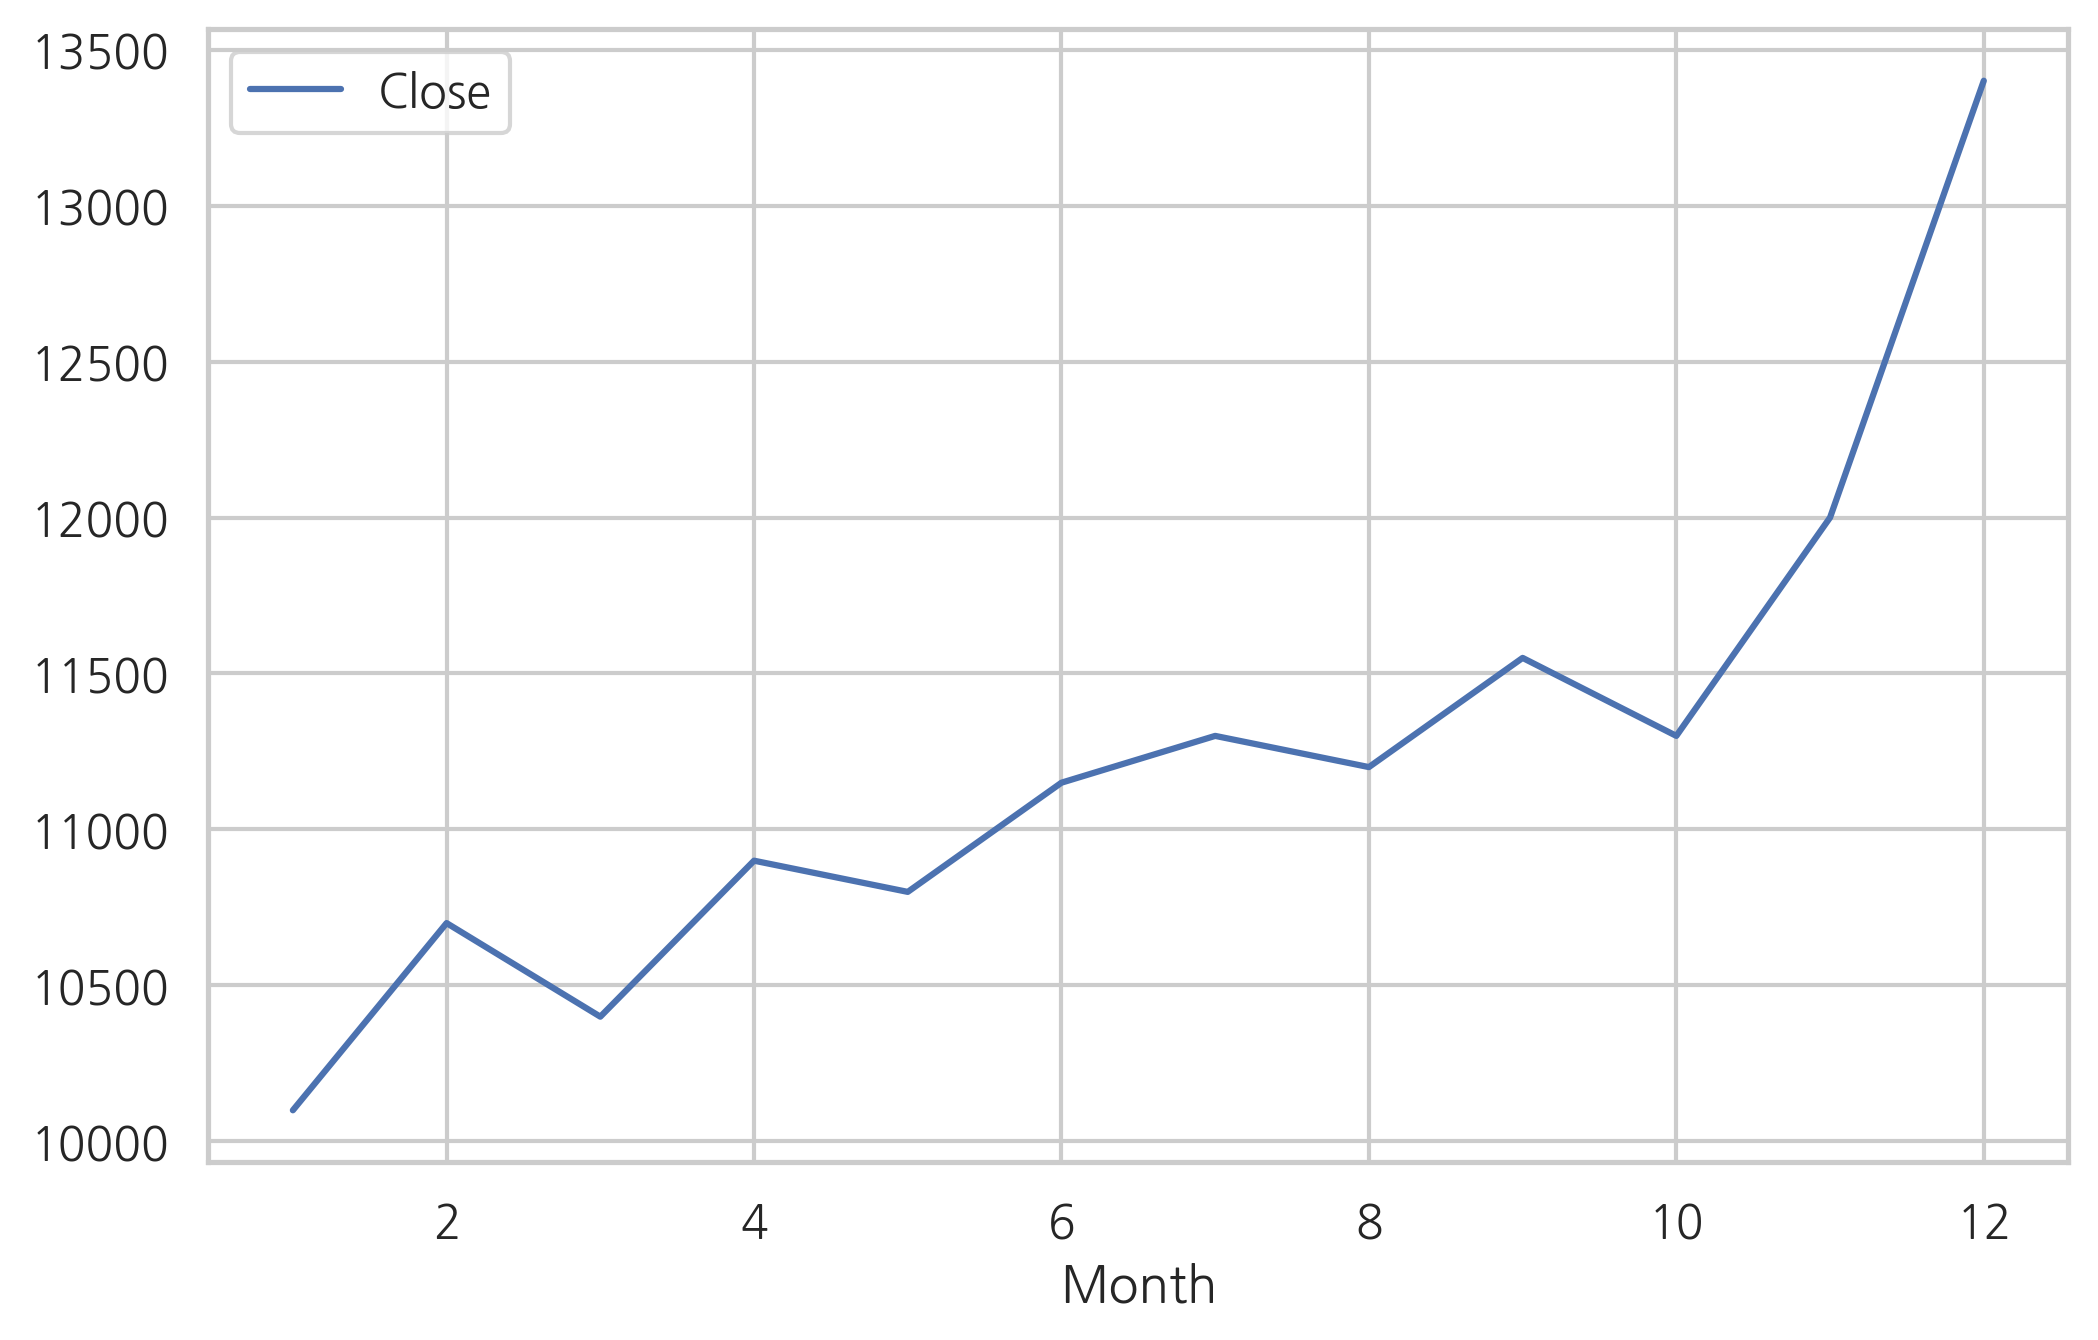

In [ ]:
df_g=df_a[['Close']]
df_g.plot()

In [ ]:
df_a
df_r=df_a.reset_index()
df_r.head()

,Month,Close,Start,High,Low,Volume,Year,Date_m,index
0,1,10100,10850,10900,10000,137977,2018,2018-07,2019-01-01 00:00:00+09:00
1,2,10700,10550,10900,9990,170253,2018,2018-06,2019-02-01 00:00:00+09:00
2,3,10400,10900,10950,10150,155769,2018,2018-06,2019-03-01 00:00:00+09:00
3,4,10900,10800,11050,10500,133548,2018,2018-06,2019-04-01 00:00:00+09:00
4,5,10800,10900,11000,10700,63039,2018,2018-06,2019-05-01 00:00:00+09:00


In [ ]:
df_a.set_index('index',inplace=True)
df_a.head()

,Close,Start,High,Low,Volume,Year,Date_m
index,,,,,,,
2019-01-01 00:00:00+09:00,10100,10850,10900,10000,137977,2018,2018-07
2019-02-01 00:00:00+09:00,10700,10550,10900,9990,170253,2018,2018-06
2019-03-01 00:00:00+09:00,10400,10900,10950,10150,155769,2018,2018-06
2019-04-01 00:00:00+09:00,10900,10800,11050,10500,133548,2018,2018-06
2019-05-01 00:00:00+09:00,10800,10900,11000,10700,63039,2018,2018-06


In [ ]:
df_sorted = df_a.sort_index(ascending=False)
df_sorted.head()

,Close,Start,High,Low,Volume,Year,Date_m
index,,,,,,,
2019-12-01 00:00:00+09:00,13400,13600,13600,12900,201376,2018,2018-06
2019-11-01 00:00:00+09:00,12000,13400,13400,12000,309787,2018,2018-06
2019-10-01 00:00:00+09:00,11300,11850,11950,11300,180656,2018,2018-06
2019-09-01 00:00:00+09:00,11550,11200,11600,10900,308596,2018,2018-06
2019-08-01 00:00:00+09:00,11200,11350,11750,11200,133002,2018,2018-06


In [ ]:
df_value = df_a.sort_values(by='Volume',ascending=False)
df_value.head()

,Close,Start,High,Low,Volume,Year,Date_m
index,,,,,,,
2019-11-01 00:00:00+09:00,12000,13400,13400,12000,309787,2018,2018-06
2019-09-01 00:00:00+09:00,11550,11200,11600,10900,308596,2018,2018-06
2019-12-01 00:00:00+09:00,13400,13600,13600,12900,201376,2018,2018-06
2019-10-01 00:00:00+09:00,11300,11850,11950,11300,180656,2018,2018-06
2019-02-01 00:00:00+09:00,10700,10550,10900,9990,170253,2018,2018-06


In [ ]:
df_i = df_a.reset_index()
df_i.head()

,index,Close,Start,High,Low,Volume,Year,Date_m
0,2019-01-01 00:00:00+09:00,10100,10850,10900,10000,137977,2018,2018-07
1,2019-02-01 00:00:00+09:00,10700,10550,10900,9990,170253,2018,2018-06
2,2019-03-01 00:00:00+09:00,10400,10900,10950,10150,155769,2018,2018-06
3,2019-04-01 00:00:00+09:00,10900,10800,11050,10500,133548,2018,2018-06
4,2019-05-01 00:00:00+09:00,10800,10900,11000,10700,63039,2018,2018-06


In [ ]:
# 월 간격, 월의 마지막 날 기준
ts_me = pd.date_range('2019-01-01', periods=6, 
                   freq='M',              # 시간 간격 (M: 월의 마지막 날)
                   tz='Asia/Seoul')       # 시간대(timezone)
print(ts_me)
print('\n')

# 분기(3개월) 간격, 월의 마지막 날 기준
ts_3m = pd.date_range('2019-01-01', periods=6, 
                   freq='3M',             # 시간 간격 (3M: 3개월)
                   tz='Asia/Seoul')       # 시간대(timezone)
print(ts_3m)

DatetimeIndex(['2019-01-31 00:00:00+09:00', '2019-02-28 00:00:00+09:00',
               '2019-03-31 00:00:00+09:00', '2019-04-30 00:00:00+09:00',
               '2019-05-31 00:00:00+09:00', '2019-06-30 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='M')


DatetimeIndex(['2019-01-31 00:00:00+09:00', '2019-04-30 00:00:00+09:00',
               '2019-07-31 00:00:00+09:00', '2019-10-31 00:00:00+09:00',
               '2020-01-31 00:00:00+09:00', '2020-04-30 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='3M')


In [ ]:
# Period 배열 
import pandas as pd

# Period 배열 만들기 - 1개월 길이
pr_m = pd.period_range(start='2019-01-01',     # 날짜 범위의 시작
                   end=None,                   # 날짜 범위의 끝
                   periods=3,                  # 생성할 Period 개수
                   freq='M')                   # 기간의 길이 (M: 월)
print(pr_m)
print('\n')

# Period 배열 만들기 - 1시간 길이
pr_h = pd.period_range(start='2019-01-01',     # 날짜 범위의 시작
                   end=None,                   # 날짜 범위의 끝
                   periods=3,                  # 생성할 Period 개수
                   freq='H')                   # 기간의 길이 (H: 시간)
print(pr_h)
print('\n')

# Period 배열 만들기 - 2시간 길이
pr_2h = pd.period_range(start='2019-01-01',    # 날짜 범위의 시작
                   end=None,                   # 날짜 범위의 끝
                   periods=3,                  # 생성할 Period 개수
                   freq='2H')                  # 기간의 길이 (H: 시간)
print(pr_2h)

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]')


PeriodIndex(['2019-01-01 00:00', '2019-01-01 01:00', '2019-01-01 02:00'], dtype='period[H]')


PeriodIndex(['2019-01-01 00:00', '2019-01-01 02:00', '2019-01-01 04:00'], dtype='period[2H]')


python, numpy, pandas 날짜 타입 비교 및 정리
- https://ellun.tistory.com/320

In [ ]:
#  Python datetime 과 timestamp
# 시계열 데이터를 다룸에 있어서 사용자에게 친숙한 형태는 datetime 형태
# 서로 다른 언어, 서로 다른 시간대에 있는 데이터를 다룸에 있어서는 통일된 timestamp 방식이 효율적

In [ ]:
# timestamp -> str 변환
import time
today = time.time()
print(today,type(today))
s = str(today)
print(s, type(s))

1642251552.314645 <class 'float'>
1642251552.314645 <class 'str'>


In [ ]:
# datetime -> str
from datetime import datetime
s= datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print(s,type(s))

2022-01-15 21:59:22 <class 'str'>


In [ ]:
# str -> timestamp
from datetime import datetime
import time

s = '2020-09-17 18:02:22'
timestamp = time.mktime(datetime.strptime(s, '%Y-%m-%d %H:%M:%S').timetuple())
print(timestamp)

In [ ]:
# datetime -> timestamp
from datetime import datetime
import time
print(datetime.now())
timestamp = time.mktime(datetime.now().timetuple())
# print(datetime.today())
# timestamp = time.mktime(datetime.today().timetuple())
print(timestamp)

2022-01-15 21:59:39.388110
1642251579.0


In [ ]:
# str ->  datetime
from datetime import datetime
s = '2020-09-17 18:02:22'
dt = datetime.strptime(s, '%Y-%m-%d %H:%M:%S')
print(dt,type(dt))

2020-09-17 18:02:22 <class 'datetime.datetime'>


In [ ]:
# timestamp -> datetime
from datetime import datetime
import time
print(time.time())
t = time.time()
d = datetime.fromtimestamp(t)
print(d)

1642251600.9868922
2022-01-15 22:00:00.986892


In [ ]:
# [과제] 1) str -> datetime, 2) datetime -> str -> timestamp 3) timestamp -> str -> datetime

In [ ]:
from datetime import datetime
import time
today = time.time()
print(today,type(today),'\n')
t = datetime.fromtimestamp(today)
s= datetime.now().strftime('%Y-%m-%d %H:%M:%S')
print(s,type(s),'\n')
dt = datetime.strptime(s, '%Y-%m-%d %H:%M:%S')
print(dt,type(dt))

1642399358.053105 <class 'float'> 

2022-01-17 15:02:38 <class 'str'> 

2022-01-17 15:02:38 <class 'datetime.datetime'>


In [ ]:
d = str(today)
dt = datetime.strptime(s, '%Y-%m-%d %H:%M:%S')


In [ ]:
# 1년전 datetime 값
from datetime import timedelta
import time

datetime_now = datetime.now()
delta_datetime = timedelta(days=-365)
print(delta_datetime)
datetime_now + delta_datetime


-365 days, 0:00:00


datetime.datetime(2021, 1, 15, 22, 9, 51, 721694)

In [ ]:
# 두 날짜간의 일수 구하기
from datetime import datetime
since_timestamp = datetime.strptime('20180301','%Y%m%d')
until_timestamp = datetime.strptime('20180331','%Y%m%d')
result = until_timestamp - since_timestamp
result

datetime.timedelta(days=30)

In [ ]:
# 특정일 구하기
import datetime

def get_yoil(y,m,d):
    days = ['MON','TUE','WED','THU','FRI','SAT','SUN']
    return days[datetime.date(y,m,d).weekday()]
get_yoil(2018,3,30)

'FRI'

In [ ]:
days = ['MON','TUE','WED','THU','FRI','SAT','SUN']
date = datetime.date(2018,3,30)
print(type(date))
days[date.weekday()]

<class 'datetime.date'>


'FRI'

In [ ]:
# 판다스 이용
pd.Timestamp(1513393355, unit='s', tz='US/Pacific')

Timestamp('2017-12-15 19:02:35-0800', tz='US/Pacific')

In [ ]:
import pandas as pd

date = pd.Timestamp(1623564115.0,unit='s',tz='Asia/Seoul')
print(type(date))
date

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


Timestamp('2021-06-13 15:01:55+0900', tz='Asia/Seoul')

In [ ]:
pd.to_datetime([1,2,3], unit='D',origin=pd.Timestamp('1960-01-10'))

DatetimeIndex(['1960-01-11', '1960-01-12', '1960-01-13'], dtype='datetime64[ns]', freq=None)

In [ ]:
pr_m = pd.period_range(start='2019-01-01',end=None, periods=3,freq='M')
pr_m

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]')

In [ ]:
pd.to_datetime('20210321', format='%Y%m%d',errors='ignore')

Timestamp('2021-03-21 00:00:00')

In [ ]:
import numpy as np
sr0 = pd.Series(pd.date_range('2021-01-01',periods=10,freq='D'),name='date')
sr1 = pd.Series(np.random.randint(1000,2000,10),name='price')
sr2 = pd.Series((np.random.rand(10)*100).round(2),name='profit')
df = pd.concat([sr0,sr1,sr2],axis=1)
df.head()

,date,price,profit
0,2021-01-01,1165,58.25
1,2021-01-02,1913,92.24
2,2021-01-03,1003,29.73
3,2021-01-04,1928,32.47
4,2021-01-05,1905,12.50


In [ ]:
# 열 분리
# to_datetime : datetime64로 변환 
import pandas as pd

# 데이터셋 가져오기
# df = pd.read_excel('./dataset/주가데이터.xlsx')
df = pd.read_csv('./dataset/주가데이터.csv')

df['Date'] = pd.to_datetime(df['연월일'])
print(df.dtypes)
df.head()

연월일             object
당일종가             int64
전일종가             int64
시가               int64
고가               int64
저가               int64
거래량              int64
Date    datetime64[ns]
dtype: object


,연월일,당일종가,전일종가,시가,고가,저가,거래량,Date
0,2018-07-02,10100,600,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,300,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,500,10900,10950,10150,155769,2018-06-28
3,2018-06-27,10900,100,10800,11050,10500,133548,2018-06-27
4,2018-06-26,10800,350,10900,11000,10700,63039,2018-06-26


In [ ]:
# df.set_index('Date', inplace=True)
df.drop('연월일', axis=1, inplace=True)
df.head()

,당일종가,전일종가,시가,고가,저가,거래량,Date
0,10100,600,10850,10900,10000,137977,2018-07-02
1,10700,300,10550,10900,9990,170253,2018-06-29
2,10400,500,10900,10950,10150,155769,2018-06-28
3,10900,100,10800,11050,10500,133548,2018-06-27
4,10800,350,10900,11000,10700,63039,2018-06-26


In [ ]:
df['연'] = df['Date'].dt.year
df['월'] = df['Date'].dt.month
df['일'] = df['Date'].dt.day
df.head()
print()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   당일종가    20 non-null     int64         
 1   전일종가    20 non-null     int64         
 2   시가      20 non-null     int64         
 3   고가      20 non-null     int64         
 4   저가      20 non-null     int64         
 5   거래량     20 non-null     int64         
 6   Date    20 non-null     datetime64[ns]
 7   연       20 non-null     int64         
 8   월       20 non-null     int64         
 9   일       20 non-null     int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 1.7 KB


Q. './dataset/stock-data.csv'를 데이터프레임으로 불러와서 datetime64 자료형으로 변환한 후에 년, 월, 일로 분리하고 year를 인덱스로 셋팅하여 출력하세요.

In [ ]:
# A.
# 날짜 데이터 분리

import pandas as pd

# read_csv() 함수로 파일 읽어와서 df로 변환
df = pd.read_csv('./dataset/stock-data.csv')

# 문자열인 날짜 데이터를 판다스 Timestamp로 변환
df['new_Date'] = pd.to_datetime(df['Date'])   #df에 새로운 열로 추가
df.drop('Date',axis=1,inplace=True)

# dt 속성을 이용하여 new_Date 열의 년월일 정보를 년, 월, 일로 구분
df['Year'] = df['new_Date'].dt.year
df['Month'] = df['new_Date'].dt.month
df['Day'] = df['new_Date'].dt.day
df.set_index('Year',inplace=True)
df.head()


,Close,Start,High,Low,Volume,new_Date,Month,Day
Year,,,,,,,,
2018,10100,10850,10900,10000,137977,2018-07-02,7,2
2018,10700,10550,10900,9990,170253,2018-06-29,6,29
2018,10400,10900,10950,10150,155769,2018-06-28,6,28
2018,10900,10800,11050,10500,133548,2018-06-27,6,27
2018,10800,10900,11000,10700,63039,2018-06-26,6,26


Q. './dataset/stock-data.csv'를 데이터프레임으로 불러와서 datetime64 자료형으로 변환한 후에 Period로 변환하고 년월일 표기 변경하여 년월을 인데스로 셋팅하여 출력하세요.

In [ ]:
# A.
# Period로 변환하여 년월을 인덱스로 출력

import pandas as pd

# read_csv() 함수로 파일 읽어와서 df로 변환
df = pd.read_csv('./dataset/stock-data.csv')

# 문자열인 날짜 데이터를 판다스 Timestamp로 변환
df['new_Date'] = pd.to_datetime(df['Date'])   # 새로운 열에 추가
df.drop('Date',axis=1, inplace=True)

# Timestamp를 Period로 변환하여 년월일 표기 변경하기
df['Date_yr'] = df['new_Date'].dt.to_period(freq='A')
df['Date_m'] = df['new_Date'].dt.to_period(freq='M')
df.drop(['new_Date','Date_yr'],axis=1, inplace=True)
# 원하는 열을 새로운 행 인덱스로 지정
df.set_index('Date_m', inplace=True)
df.head()

,Close,Start,High,Low,Volume
Date_m,,,,,
2018-07,10100,10850,10900,10000,137977
2018-06,10700,10550,10900,9990,170253
2018-06,10400,10900,10950,10150,155769
2018-06,10900,10800,11050,10500,133548
2018-06,10800,10900,11000,10700,63039


In [ ]:
%pwd

'C:\\cakd7\\강의\\m2_분석라이브러리활용\\pandas'

<img src = 'apply_applymap_pipe.jpg' STYLE='width:800px;'>

[pipe vs applymap vs apply]  

pipe와 applymap과의 차이는 반환하는 결과가 pipe가 더 다양하다는 것으로 applymap은 데이터프레임 원소에 적용하므로 데이터프레임으로만 리턴되지만 pipe는 사용자 함수의 리턴값에 따라 개별 값, 시리즈, 데이터프레임을 반환할 수 있다.  

현재 가장 많이 쓰이는 메서드는 apply인데 그 이유는 다양한 형태로 값을 입력 받을 수 있고, 반환하는 형태도 폭이 넓기 때문. 결과는 같아보이지만, 시리즈를 이용해 데이터프레임의 행과 열도 이용할 수 있으며 시리즈 그 자체도 함수로 활용할 수 있다. 

만약 데이터프레임에 함수를 적용해야한다면 리턴하는 형태가 많은 pipe 사용도 고려

applymap()과 관련된 함수는 주어진 DataFrame의 모든 요소에 적용되므로applymap()메소드는 DataFrames에만 정의됩니다. 마찬가지로apply()메소드와 관련된 함수는 DataFrame 또는Series의 모든 요소에 적용 할 수 있으므로 Series 및 DataFrame 객체 모두에 대해apply()메소드가 정의됩니다.

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'Col1': [30,40,50,60],
    'Col2': [23,35,65,45],
    'Col3': [85,87,90,89],

},index=["A","B","C","D"])

print(df,"\n")

   Col1  Col2  Col3
A    30    23    85
B    40    35    87
C    50    65    90
D    60    45    89 



In [ ]:
# df.apply(lambda x:x.sum(),axis=1)
df.apply(lambda x:x.sum(),axis=0)

Col1    180
Col2    168
Col3    351
dtype: int64

In [ ]:
df.Col1.apply(lambda x:x+1)

A    31
B    41
C    51
D    61
Name: Col1, dtype: int64

In [ ]:
df.apply(lambda x:x+1)

,Col1,Col2,Col3
A,31,24,86
B,41,36,88
C,51,66,91
D,61,46,90


In [ ]:
# df.Col1.apply(lambda x:x+1)
df.Col1.map(lambda x:x+1)

A    31
B    41
C    51
D    61
Name: Col1, dtype: int64

In [ ]:
'''applymap은 apply와 형식은 비슷한데 접근하는 개체가 개별적입니다. 즉, 각 원소에 lambda를 적용하는 
경우입니다.lambda에서 if 와 같이 조건을 넣을 수 있는데 apply에서는 column이나 row 전체가 움직이게 
설계가 된다면 applymap은 각 원소에 설계가 됩니다.'''

# df.applymap(lambda x:x+1)
df.applymap(lambda x:'%.2f'% x)

,Col1,Col2,Col3
A,30.00,23.00,85.00
B,40.00,35.00,87.00
C,50.00,65.00,90.00
D,60.00,45.00,89.00


In [ ]:
# The pipe() method allows you to apply one or more functions to the DataFrame object.

import pandas as pd

def change_age(x):
  x["age"]=[10, 20, 30]
  return x

data = {
  "name": ["Sally", "Mary", "John"],
  "age": [50, 40, 30]
}

df = pd.DataFrame(data)
df

,name,age
0,Sally,50
1,Mary,40
2,John,30


In [ ]:
df.pipe(change_age)
print(df)

    name  age
0  Sally   10
1   Mary   20
2   John   30


In [ ]:
import seaborn as sns
import pandas as pd

# titanic 데이터셋 로딩
titanic = sns.load_dataset('titanic')

# IPyhton 디스플레이 설정 변경 - 출력할 최대 열의 개수
pd.set_option('display.max_columns', 15) 
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Q. 함수 매핑을 이용하여 age에 각각 10을 곱하고 5를 더한 후 다시 더한 결과 값이 출력되게 하세요.
df = titanic.copy()
def cal_three_obj(a,b,c):
    return (a * b) + (a + c)

df['age'] = df.age.apply(cal_three_obj, b=10, c=5)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,247.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,423.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,291.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,390.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,390.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Q. titanic.fare 데이터를 소수 2째자리 형태로 모두 출력하세요.
df = titanic.copy()
df['fare'] = round(df.fare,2)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.28,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.10,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Q. df에서 fare와 age를 선택하여 100을 곱한 후 출력하세요
df = titanic.copy()
df[['fare','age']]= df[['fare','age']].apply(lambda x:x*100)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,2200.0,1,0,725.00,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,3800.0,1,0,7128.33,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,2600.0,0,0,792.50,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,3500.0,1,0,5310.00,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,3500.0,0,0,805.00,S,Third,man,True,NaN,Southampton,no,True


Q. titanic 데이터셋에서 5개 열을 선택해서 class열을 기준으로 그룹화를 수행한 후 아래와 같이 출력하였다. 다음 사항을 출력하세요.
- 그룹별 평균 출력
- 그룹별 최대값 출력

In [ ]:
import pandas as pd
import seaborn as sns

# titanic 데이터셋에서 age, sex 등 5개 열을 선택하여 데이터프레임 만들기
titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex', 'class', 'fare', 'survived']]

print('승객 수:', len(df))
print(df.head())

# class 열을 기준으로 분할(1개 열을 기준)
grouped = df.groupby(['class']) 

# 그룹 객체를 iteration으로 출력: head() 메소드로 첫 5행만을 출력
for key, group in grouped:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.head())

승객 수: 891
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
1  38.0  female  First  71.2833         1
2  26.0  female  Third   7.9250         1
3  35.0  female  First  53.1000         1
4  35.0    male  Third   8.0500         0
* key : First
* number : 216
     age     sex  class     fare  survived
1   38.0  female  First  71.2833         1
3   35.0  female  First  53.1000         1
6   54.0    male  First  51.8625         0
11  58.0  female  First  26.5500         1
23  28.0    male  First  35.5000         1
* key : Second
* number : 184
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
17   NaN    male  Second  13.0000         1
20  35.0    male  Second  26.0000         0
21  34.0    male  Second  13.0000         1
* key : Third
* number : 491
    age     sex  class     fare  survived
0  22.0    male  Third   7.2500         0
2  26.0  female  Third   7.9250         1
4 

In [ ]:
# A.
# 연산 메소드 적용
average = grouped.mean()
print(average)

stat = grouped.max()
stat

              age       fare  survived
class                                 
First   38.233441  84.154687  0.629630
Second  29.877630  20.662183  0.472826
Third   25.140620  13.675550  0.242363


,age,sex,fare,survived
class,,,,
First,80.0,male,512.3292,1
Second,70.0,male,73.5000,1
Third,74.0,male,69.5500,1


In [ ]:
# Q. 'Third'그룹만을 선택해서 group3 이름으로 저장하고 통계요약표를 출력하세요.
# A.
# 개별 그룹 선택하기
group3 = grouped.get_group('Third')
group3.describe()

,age,fare,survived
count,355.000000,491.000000,491.000000
mean,25.140620,13.675550,0.242363
std,12.495398,11.778142,0.428949
min,0.420000,0.000000,0.000000
25%,18.000000,7.750000,0.000000
50%,24.000000,8.050000,0.000000
75%,32.000000,15.500000,0.000000
max,74.000000,69.550000,1.000000


In [ ]:
# Q. class 열, sex 열을 기준으로 분할하여 grouped_two에 저장 후 for문을 사용 iteration으로 출력하세요.
# A.
# class 열, sex 열을 기준으로 분할(여러 열을 기준으로 분할)
grouped_two = df.groupby(['class', 'sex'])

# grouped_two 그룹 객체를 iteration으로 출력
for key, group in grouped_two:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.head())

* key : ('First', 'female')
* number : 94
     age     sex  class      fare  survived
1   38.0  female  First   71.2833         1
3   35.0  female  First   53.1000         1
11  58.0  female  First   26.5500         1
31   NaN  female  First  146.5208         1
52  49.0  female  First   76.7292         1
* key : ('First', 'male')
* number : 122
     age   sex  class      fare  survived
6   54.0  male  First   51.8625         0
23  28.0  male  First   35.5000         1
27  19.0  male  First  263.0000         0
30  40.0  male  First   27.7208         0
34  28.0  male  First   82.1708         0
* key : ('Second', 'female')
* number : 76
     age     sex   class     fare  survived
9   14.0  female  Second  30.0708         1
15  55.0  female  Second  16.0000         1
41  27.0  female  Second  21.0000         0
43   3.0  female  Second  41.5792         1
53  29.0  female  Second  26.0000         1
* key : ('Second', 'male')
* number : 108
     age   sex   class  fare  survived
17   NaN  mal

In [ ]:
# Q. grouped_two 그룹 객체에서 ('Third',female) 그룹을 선택해서 group3f에 저장하고 처음 5개행을 출력하세요.
# A.
# grouped_two 그룹 객체에서 개별 그룹 선택하기
group3f = grouped_two.get_group(('Third','female'))
print(group3f.head())

     age     sex  class     fare  survived
2   26.0  female  Third   7.9250         1
8   27.0  female  Third  11.1333         1
10   4.0  female  Third  16.7000         1
14  14.0  female  Third   7.8542         0
18  31.0  female  Third  18.0000         0


In [ ]:
# Q. 함께 탑승한 형제 또는 배우자의 수가 3, 4, 5인 승객만 따로 추출하세요.(불린 인덱싱, isin() 메소드)
titanic = sns.load_dataset('titanic')
mask3 = titanic['sibsp'] == 3
mask4 = titanic['sibsp'] == 4
mask5 = titanic['sibsp'] == 5
mask = titanic.sibsp == 3,4,5
df_boolean = titanic[mask3 | mask4 | mask5]
print(df_boolean[['survived','sibsp','parch']].head(),'\n')

# isin() 메서드 활용하여 동일한 조건으로 추출
isin_filter = titanic['sibsp'].isin([3, 4, 5])
df_isin = titanic[isin_filter]
print(df_isin[['survived','sibsp','parch']].head())

    survived  sibsp  parch
7          0      3      1
16         0      4      1
24         0      3      1
27         0      3      2
50         0      4      1 

    survived  sibsp  parch
7          0      3      1
16         0      4      1
24         0      3      1
27         0      3      2
50         0      4      1


In [1]:
import pandas as pd
auto_df = pd.read_csv('./dataset/auto-mpg.csv')
auto_df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [17]:
# read_csv() 함수로 df 생성
import pandas as pd
auto_df = pd.read_csv('./dataset/auto-mpg.csv')
# 열 이름을 지정
# auto_df.columns = ['mpg','cylinders','displacement','horsepower','weight',
#               'acceleration','model year','origin','name'] 
auto_df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [6]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [18]:
adf = auto_df[['mpg','cylinders','displacement','horsepower','weight']]
adf.head()

,mpg,cylinders,displacement,horsepower,weight
0,18.0,8,307.0,130,3504
1,15.0,8,350.0,165,3693
2,18.0,8,318.0,150,3436
3,16.0,8,304.0,150,3433
4,17.0,8,302.0,140,3449


In [9]:
# Q. 'mpg'를 'kpl' 로 환산하여 새로운 열을 생성하고 처음 3개 행을 소수점 아래 둘째 자리에서 반올림하여 출력하세요.
# A.
# mpg(mile per gallon)를 kpl(kilometer per liter)로 변환 (mpg_to_kpl = 0.425)
mpg_to_kpl = 1.60934 / 3.78541

# mpg 열에 0.425를 곱한 결과를 새로운 열(kpl)에 추가
auto_df['kpl'] = auto_df['mpg'] * mpg_to_kpl

# kpl 열을 소수점 아래 둘째 자리에서 반올림 
auto_df['kpl'] = auto_df['kpl'].round(2)
auto_df[['mpg','kpl']].head(3)    

,mpg,kpl
0,18.0,7.65
1,15.0,6.38
2,18.0,7.65


In [19]:
# Q. horsepower 열을 체크해서 전처리가 필요한 사항을 기술하세요.
print(adf['horsepower'].unique())

['130' '165' '150' '140' '198' '220' '215' '225' '190' '170' '160' '95'
 '97' '85' '88' '46' '87' '90' '113' '200' '210' '193' '?' '100' '105'
 '175' '153' '180' '110' '72' '86' '70' '76' '65' '69' '60' '80' '54'
 '208' '155' '112' '92' '145' '137' '158' '167' '94' '107' '230' '49' '75'
 '91' '122' '67' '83' '78' '52' '61' '93' '148' '129' '96' '71' '98' '115'
 '53' '81' '79' '120' '152' '102' '108' '68' '58' '149' '89' '63' '48'
 '66' '139' '103' '125' '133' '138' '135' '142' '77' '62' '132' '84' '64'
 '74' '116' '82']


In [ ]:
# Q. horsepower 열의 누락 데이터 '?'을 삭제한 후 NaN 값의 갯수를 출력하세요.
# A.
# 누락 데이터('?') 삭제 
import numpy as np
auto_df['horsepower'].replace('?', np.nan, inplace=True)
print(auto_df['horsepower'].isnull().sum())# '?'을 np.nan으로 변경

auto_df.dropna(subset=['horsepower'], axis=0, inplace=True)       # 누락데이터 행을 삭제
auto_df['horsepower'].isnull().sum()

6


0

In [21]:
idx_1= adf[adf.horsepower == '?'].index
idx_1
# df.drop(idx_1)

Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [25]:
adf1 = adf.drop(idx_1)
adf1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 18.4+ KB


In [31]:
adf1.horsepower = adf1.horsepower.astype(int)
adf1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int32  
 4   weight        392 non-null    int64  
dtypes: float64(2), int32(1), int64(2)
memory usage: 16.8 KB


In [33]:
hp_mean = adf1.horsepower.mean()
hp_mean

104.46938775510205

In [34]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [38]:
auto_df['horsepower'].replace('?', hp_mean, inplace=True)
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [40]:
auto_df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', 104.46938775510205, '100', '105', '175',
       '153', '180', '110', '72', '86', '70', '76', '65', '69', '60',
       '80', '54', '208', '155', '112', '92', '145', '137', '158', '167',
       '94', '107', '230', '49', '75', '91', '122', '67', '83', '78',
       '52', '61', '93', '148', '129', '96', '71', '98', '115', '53',
       '81', '79', '120', '152', '102', '108', '68', '58', '149', '89',
       '63', '48', '66', '139', '103', '125', '133', '138', '135', '142',
       '77', '62', '132', '84', '64', '74', '116', '82'], dtype=object)

In [ ]:
# Q. horsepower 문자열을 실수형으로 변환한 후 자료형을 확인하세요.
auto_df['horsepower'] = auto_df.horsepower.astype(float)
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [ ]:
# Q. auto_df를 바이너리 파일로 auto_df.pkl로 저장 후 다시 불러오세요
auto_df.to_pickle('./dataset/auto_df.pkl')
auto_df = pd.read_pickle('./dataset/auto_df.pkl')
print(auto_df.horsepower.dtype)
auto_df.head()                         

float64


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [66]:
li1 = [-100, -50, -20]
li2 = [-100, -50, -20, 50, 100]
df = pd.DataFrame(li2,columns=['num'])
df
df['num1'] = df.num/abs(df.num.max())
print(df,'\n')
df['num2'] = df.num/df.num.max()
print(df)

   num  num1
0 -100  -1.0
1  -50  -0.5
2  -20  -0.2
3   50   0.5
4  100   1.0 

   num  num1  num2
0 -100  -1.0  -1.0
1  -50  -0.5  -0.5
2  -20  -0.2  -0.2
3   50   0.5   0.5
4  100   1.0   1.0


In [60]:
df['num2'] = (df.num-df.num.min())/(df.num.max()-df.num.min())
df

,num,num1,num2
0,-100,-5.0,0.000000
1,-50,-2.5,0.416667
2,-30,-1.5,0.583333
3,-20,-1.0,0.666667
4,20,1.0,1.000000


In [61]:
df['num3'] = (df.num-df.num.min())/(abs(df.num.max())-df.num.min())
df

,num,num1,num2,num3
0,-100,-5.0,0.000000,0.000000
1,-50,-2.5,0.416667,0.416667
2,-30,-1.5,0.583333,0.583333
3,-20,-1.0,0.666667,0.666667
4,20,1.0,1.000000,1.000000


- 주어진 데이터셋의 각 값에 대해 Z-점수를 계산. 여기서 np.mean()과 np.std() 함수는 각각 평균과 표준편차를 계산하는 데 사용됩니다. 
- df['z_score']에 계산된 Z-점수를 저장. 
- 결과적으로 생성된 z_score 열은 원본 데이터를 표준화된 형태로 나타난다.

In [79]:
import numpy as np
import pandas as pd

# 예제 데이터
data = [10, 20, 30, 40, 50]
df = pd.DataFrame(data, columns=['value'])

# 평균과 표준편차 계산
mean_value = np.mean(data)
std_value = np.std(data, ddof=0)  # ddof=0은 모집단 표준편차를 계산

# Z-점수 계산
df['z_score'] = (df['value'] - mean_value) / std_value

# 결과 출력
print(df)


   value   z_score
0     10 -1.414214
1     20 -0.707107
2     30  0.000000
3     40  0.707107
4     50  1.414214


In [ ]:
min_x = adf.horsepower - adf.horsepower.min()
min_max = adf.horsepower.max() - adf.horsepower.min()
adf.horsepower = min_x / min_max

In [51]:
df.num.max()

-20

In [68]:
# Q. horsepower 열의 최대값의 절대값으로 horsepower 열의 모든 데이터를 나눠서 저장하세요.
adf = auto_df.copy()
print(adf.horsepower.head(),'\n')
adf.horsepower = adf.horsepower / abs(adf.horsepower.max()) 
print(adf.horsepower.head(),'\n')
print(adf.horsepower.describe())

0    130.0
1    165.0
2    150.0
3    150.0
4    140.0
Name: horsepower, dtype: float64 

0    0.565217
1    0.717391
2    0.652174
3    0.652174
4    0.608696
Name: horsepower, dtype: float64 

count    392.000000
mean       0.454215
std        0.167353
min        0.200000
25%        0.326087
50%        0.406522
75%        0.547826
max        1.000000
Name: horsepower, dtype: float64


In [69]:
# Q. horsepower 각 열 데이터에서 해당 열의 최소값을 뺀 값을 분자, 해당 열의 최대값 - 최소값을 분모로 계산하여 저장하세요 
adf = auto_df.copy()
min_x = adf.horsepower - adf.horsepower.min()
min_max = adf.horsepower.max() - adf.horsepower.min()
adf.horsepower = min_x / min_max

print(adf.horsepower.head())
print()
print(adf.horsepower.describe())

0    0.456522
1    0.646739
2    0.565217
3    0.565217
4    0.510870
Name: horsepower, dtype: float64

count    392.000000
mean       0.317768
std        0.209191
min        0.000000
25%        0.157609
50%        0.258152
75%        0.434783
max        1.000000
Name: horsepower, dtype: float64


In [74]:
adf_g = adf[['mpg','cylinders','weight']]

In [76]:
adf_g.head()

,mpg,cylinders,weight
0,18.0,8,3504
1,15.0,8,3693
2,18.0,8,3436
3,16.0,8,3433
4,17.0,8,3449


In [78]:
adf_g.groupby('cylinders').max()

,mpg,weight
cylinders,,
3,23.7,2720
4,46.6,3270
5,36.4,3530
6,38.0,3907
8,26.6,5140


In [75]:

agg_format = {'mpg':'mean','weight':'max'}
adf_g1 = adf_g.groupby('cylinders').agg(agg_format)
adf_g1

,mpg,weight
cylinders,,
3,20.550000,2720
4,29.283920,3270
5,27.366667,3530
6,19.973494,3907
8,14.963107,5140


In [ ]:
# 과제
# Q1. index를 기준으로 3개 그룹으로 구분하여 a:평균, b:최대값, c:합계를 
# 각각 계산하여 출력하세요.
# d_g = df.groupby('index').mean()
agg_format={'a':'mean','b':'max','c':'sum'}
df_g = df.groupby('index').agg(agg_format)
df_g

Q. 아래 사항을 처리 하세요.
* origin 열의 고유값을 출력하세요.
* 정수형 데이터를 문자형 데이터로 변환한 후 고유값을 출력하세요.(1:'USA', 2:'EU', 3:'JAPAN')

In [67]:
# A.
auto_df = pd.read_pickle('./dataset/auto-mpg.pkl')

# origin 열의 고유값 확인
print(auto_df['origin'].unique())

# 정수형 데이터를 문자형 데이터로 변환 
auto_df['origin'].replace({1:'USA', 2:'EU', 3:'JAPAN'}, inplace=True)

print(auto_df['origin'].unique())

[1 3 2]
['USA' 'JAPAN' 'EU']


In [ ]:
# Q. origin 열의 자료형을 확인하고 범주형(category)으로 변환하여 출력하세요.
# A.
# origin 열의 자료형 확인
print(auto_df['origin'].dtypes)
# origin 열의 문자열 자료형을 범주형으로 변환
auto_df['origin'] = auto_df['origin'].astype('category')     
print(auto_df['origin'].dtypes) 
auto_df.origin.head()

category
category


0    USA
1    USA
2    USA
3    USA
4    USA
Name: origin, dtype: category
Categories (3, object): ['EU', 'JAPAN', 'USA']

In [ ]:
# Q. origin 열을 범주형에서 문자열로 변환한 후 자료형을 출력하세요.
# 범주형을 문자열로 변환
auto_df['origin'] = auto_df['origin'].astype('str')     
print(auto_df['origin'].dtypes)

object


In [ ]:
# Q. horsepower를 3개의 bin으로 나누고 bin_names = ['저출력', '보통출력', '고출력']으로 출력하세요.
# (np.histogram() 함수로 3개의 bin으로 나눔)

# A.
import pandas as pd
import numpy as np
auto_df = pd.read_pickle('./dataset/auto-mpg.pkl')

# np.histogram 함수로 3개의 bin으로 나누는 경계 값의 리스트 구하기
count, bin_dividers = np.histogram(auto_df['horsepower'], bins=3)
print(bin_dividers)
print()

# 3개의 bin에 이름 지정
bin_names = ['저출력', '보통출력', '고출력']

# pd.cut 함수로 각 데이터를 3개의 bin에 할당
auto_df['hp_bin'] = pd.cut(x=auto_df['horsepower'],     # 데이터 배열
                      bins=bin_dividers,      # 경계 값 리스트
                      labels=bin_names,       # bin 이름
                      include_lowest=True)    # 첫 경계값 포함 

# horsepower 열, hp_bin 열의 첫 15행을 출력
print(auto_df[['horsepower', 'hp_bin']].head(15))

[ 46.         107.33333333 168.66666667 230.        ]

    horsepower hp_bin
0        130.0   보통출력
1        165.0   보통출력
2        150.0   보통출력
3        150.0   보통출력
4        140.0   보통출력
5        198.0    고출력
6        220.0    고출력
7        215.0    고출력
8        225.0    고출력
9        190.0    고출력
10       170.0    고출력
11       160.0   보통출력
12       150.0   보통출력
13       225.0    고출력
14        95.0    저출력


In [ ]:
# Q. horsepower 열의 최대값의 절대값으로 모든 데이터를 나누는 정규화를 수행한 후 통계요약표를 출력하세요.
# A.
# horsepower 열의 최대값의 절대값으로 모든 데이터를 나눠서 저장
auto_df.horsepower = auto_df.horsepower / abs(auto_df.horsepower.max()) 

print(auto_df.horsepower.head())
print()
print(auto_df.horsepower.describe())

0    0.565217
1    0.717391
2    0.652174
3    0.652174
4    0.608696
Name: horsepower, dtype: float64

count    392.000000
mean       0.454215
std        0.167353
min        0.200000
25%        0.326087
50%        0.406522
75%        0.547826
max        1.000000
Name: horsepower, dtype: float64


In [ ]:
import pandas as pd
fifa = pd.read_csv('dataset/FIFA.csv',encoding='cp949')
fifa.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,...,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,...,10,2021,5'7,159,226500,110500,565
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,...,7,2022,6'2,183,127100,77000,405
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,...,10,2022,5'9,150,228100,118500,290
3,193080,De Gea,27,Spain,91,Manchester United,Right,...,1,2020,6'4,168,138600,72000,260
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,...,7,2023,5'11,154,196400,102000,355


In [ ]:
# height의 값을 cm로 변환하여 새로운 컬럼 'height_cm'을 생성하세요.

def ht_ex(x):
    f, i = map(int, x.split('\''))
    return f*30.48 + i*2.54

fifa['Height_cm'] = fifa['Height'].apply(ht_ex)
fifa[['Height','Height_cm']].head()

,Height,Height_cm
0,5'7,170.18
1,6'2,187.96
2,5'9,175.26
3,6'4,193.04
4,5'11,180.34


In [ ]:
def ftinch_to_cm(ftinch):
    ftinchlist = ftinch.split("'")
    ft = int(ftinchlist[0])
    inch = int(ftinchlist[1])
    ftcm=ft*30.48
    incm = inch*2.54
    total = ftcm + incm
    return total


fifa['Height_cm']=fifa.Height.apply(lambda x:ftinch_to_cm(x))
fifa[['Height','Height_cm']].head()

,Height,Height_cm
0,5'7,170.18
1,6'2,187.96
2,5'9,175.26
3,6'4,193.04
4,5'11,180.34
